##  Linear models

### 1. A Simple Linear Regression Example ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

This example uses the only the first feature of the `diabetes` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The ```coefficients```, the ```residual sum of squares``` and the ```variance score``` are also
calculated.

In [5]:
import numpy as np
from sklearn import datasets, linear_model

- Import  Diabetes Dataset

In [6]:
diabetes = datasets.load_diabetes()

'''Use only one feature'''
diabetes_X = diabetes.data[:, np.newaxis, 2]

- Split Dataset to Train and Test

In [7]:
'''Split the data into training/testing sets'''
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

'''Split the targets into training/testing sets'''
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

- Fit the Model

In [8]:
'''Create linear regression object'''
regr = linear_model.LinearRegression()

'''Train the model using the training sets'''
regr.fit(diabetes_X_train, diabetes_y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Calculate Regression cofficient, Mean Squared Error and Variance score.

In [9]:
'''The coefficients'''
print('Coefficients: \n', regr.coef_)


'''The mean squared error'''
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))


'''Explained variance score: 1 is perfect prediction'''
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

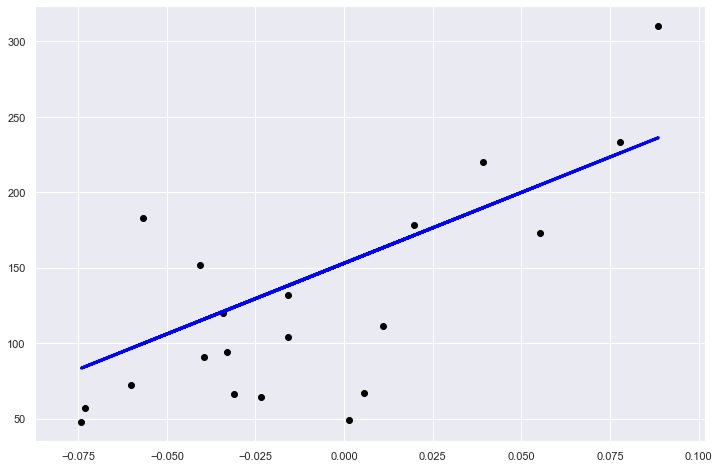

In [16]:
'''Plot outputs'''
plt.figure(figsize = [12,8])

plt.scatter(diabetes_X_test,\
            diabetes_y_test,\
            color='black')

plt.plot(diabetes_X_test,\
         regr.predict(diabetes_X_test),\
         color='blue',
         linewidth=3)

plt.grid(True)
plt.show()

### 2. Logistic Regression 3-class Classifier ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Show below is a logistic-regression classifiers decision boundaries on the
`iris <https://en.wikipedia.org/wiki/Iris_flower_data_set>`_ dataset. The
datapoints are colored according to their labels.

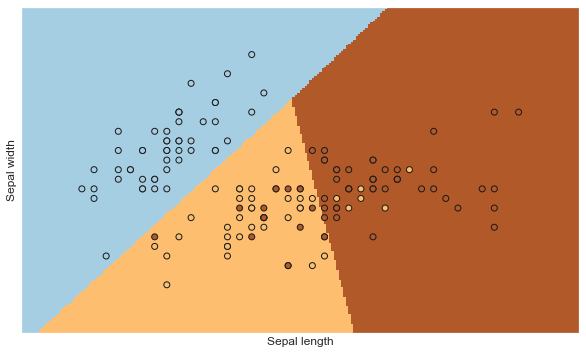

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours 
# Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. 
# For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),\
                     np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y,\
            edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()



### 3. Nearest Neighbors Classification ([Source](https://github.com/teachmex/scikit-learn/blob/master/examples/neighbors/plot_classification.py))

Sample usage of Nearest Neighbors classification.
It will plot the decision boundaries for each class.


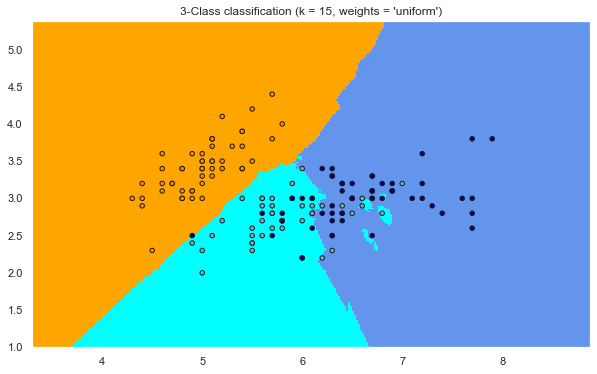

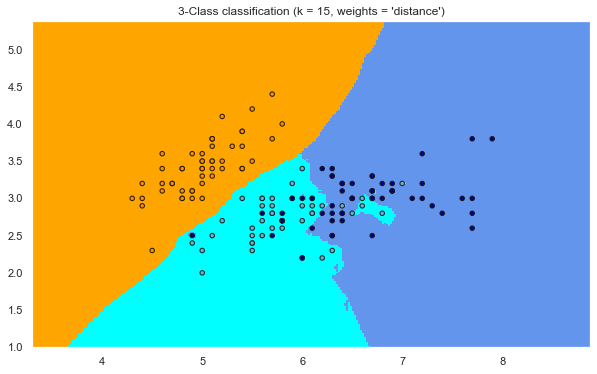

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize = [10,6])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

### 5. Decision Tree Regression ([Source](https://github.com/teachmex/scikit-learn/blob/master/examples/tree/plot_tree_regression.py))

A 1D regression with decision tree.
The :ref:`decision trees <tree>` is
used to fit a sine curve with addition noisy observation. As a result, it
learns local linear regressions approximating the sine curve.
We can see that if the maximum depth of the tree (controlled by the
`max_depth` parameter) is set too high, the decision trees learn too fine
details of the training data and learn from the noise, i.e. they overfit.

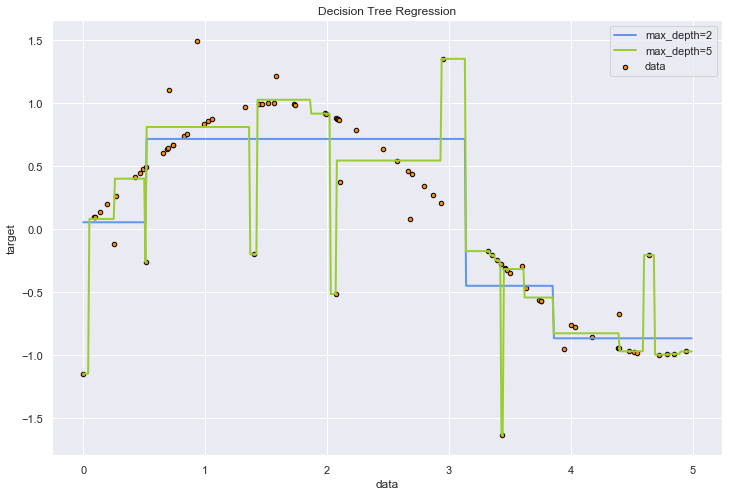

In [39]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize = [12,8])
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### 6. SVM: Maximum margin separating hyperplane ([Source](https://github.com/teachmex/scikit-learn/blob/master/examples/svm/plot_separating_hyperplane.py))_

Plot the maximum margin separating hyperplane within a two-class
separable dataset using a Support Vector Machine classifier with
linear kernel.

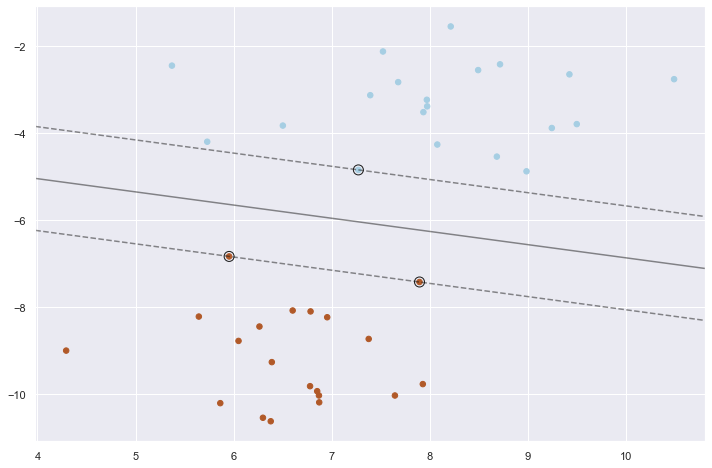

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.figure(figsize = [12,8])
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### 7. Varying regularization in Multi-layer Perceptron ([Source](https://github.com/teachmex/scikit-learn/blob/master/examples/neural_networks/plot_mlp_alpha.py))

A comparison of different values for regularization parameter 'alpha' on
synthetic datasets. The plot shows that different alphas yield different
decision functions.
Alpha is a parameter for regularization term, aka penalty term, that combats
overfitting by constraining the size of the weights. Increasing alpha may fix
high variance (a sign of overfitting) by encouraging smaller weights, resulting
in a decision boundary plot that appears with lesser curvatures.
Similarly, decreasing alpha may fix high bias (a sign of underfitting) by
encouraging larger weights, potentially resulting in a more complicated
decision boundary.


``` Author: Issam H. Laradji```

```License: BSD 3 clause```


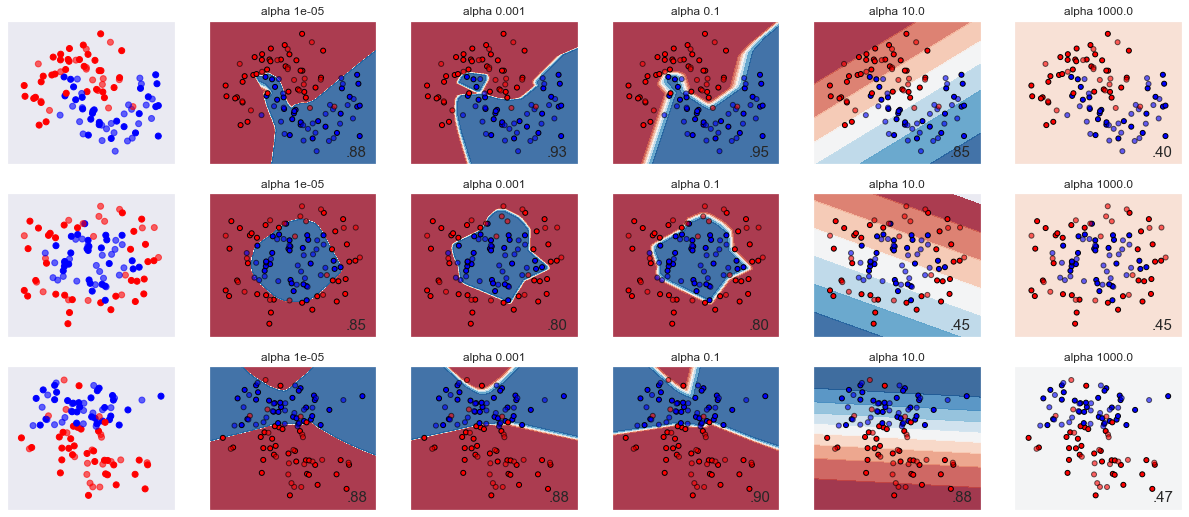

In [47]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

h = .02  # step size in the mesh

alphas = np.logspace(-5, 3, 5)
names = ['alpha ' + str(i) for i in alphas]

classifiers = []
for i in alphas:
    classifiers.append(make_pipeline(
                       StandardScaler(),
                       MLPClassifier(solver='lbfgs', alpha=i,
                                     random_state=1, max_iter=2000,
                                     early_stopping=True,
                                     hidden_layer_sizes=[100, 100])
                       ))

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()


### 8. Agglomerative clustering with and without structure ([Source](https://github.com/teachmex/scikit-learn/blob/master/examples/cluster/plot_agglomerative_clustering.py))

This example shows the effect of imposing a connectivity graph to capture
local structure in the data. The graph is simply the graph of 20 nearest
neighbors.
Two consequences of imposing a connectivity can be seen. First clustering
with a connectivity matrix is much faster.
Second, when using a connectivity matrix, single, average and complete
linkage are unstable and tend to create a few clusters that grow very
quickly. Indeed, average and complete linkage fight this percolation behavior
by considering all the distances between two clusters when merging them (
while single linkage exaggerates the behaviour by considering only the
shortest distance between clusters). The connectivity graph breaks this
mechanism for average and complete linkage, making them resemble the more
brittle single linkage. This effect is more pronounced for very sparse graphs
(try decreasing the number of neighbors in kneighbors_graph) and with
complete linkage. In particular, having a very small number of neighbors in
the graph, imposes a geometry that is close to that of single linkage,
which is well known to have this percolation instability. """


```Authors: Gael Varoquaux, Nelle Varoquaux```

```License: BSD 3 clause```

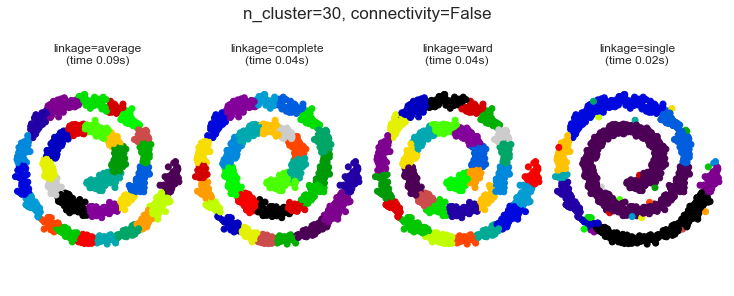

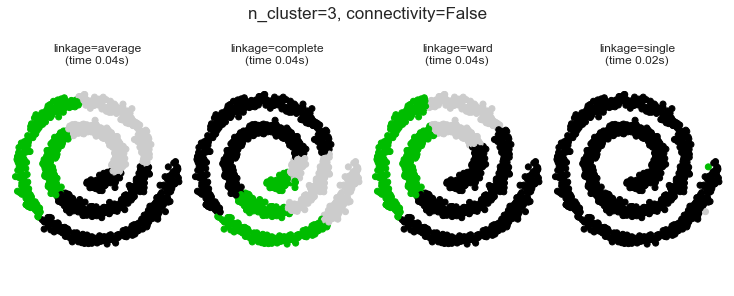

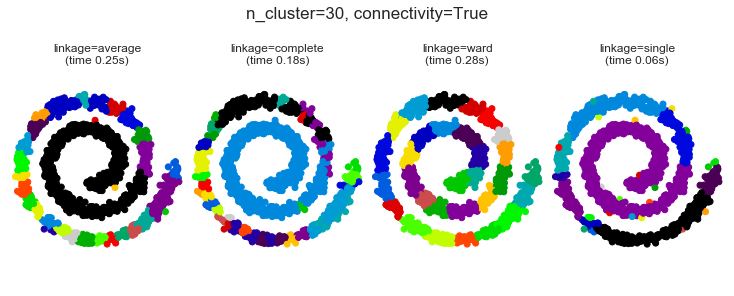

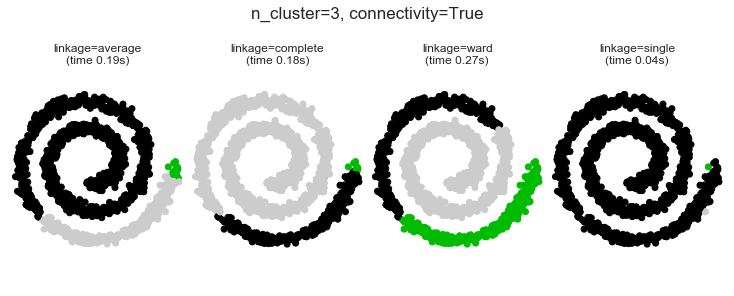

In [45]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Generate sample data
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)


X = np.concatenate((x, y))
X += .7 * np.random.randn(2, n_samples)
X = X.T

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average',
                                         'complete',
                                         'ward',
                                         'single')):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
                        cmap=plt.cm.nipy_spectral)
            plt.title('linkage=%s\n(time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.83, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()